# How do users' sentiments in reviews vary based on the length of the review, and are there any notable differences in terms of the types of issues or features users tend to mention in shorter versus longer reviews? (Attributes: Length, Sentiment)

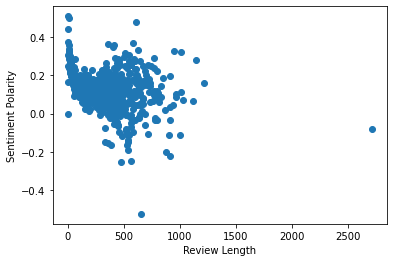

Shortest Reviews Issues:
 [('ok', 48), ('hi', 7), ('nc', 3), ('no', 3), ('wow', 3), ('bad', 3), (':p', 2), ('luv', 2), ('.', 2), ('so', 1)]
Longest Reviews Issues:
 [('i', 585), ('the', 120), ('get', 75), ('game', 75), ('even', 69), ('would', 65), ('like', 64), ('make', 50), ('play', 50), ('also', 48)]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load the datasets
apps_df = pd.read_csv("C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore.csv")
reviews_df = pd.read_csv("C:/Users/Amina Firdouse/Desktop/masters-EA/Project/googleplaystore_user_reviews.csv")

# Clean and preprocess the data
apps_df.drop_duplicates(subset="App", inplace=True)
apps_df = apps_df[apps_df["Rating"].notna()]
apps_df["Category"] = apps_df["Category"].astype("category")
reviews_df.dropna(subset=["Sentiment"], inplace=True)

# Calculate the length of each review
reviews_df["Length"] = reviews_df["Translated_Review"].str.len()

# Group the data by review length and calculate average sentiment polarity
grouped_df = reviews_df.groupby(["Length"]).agg({"Sentiment_Polarity": "mean"})

# Plot the results
plt.scatter(grouped_df.index, grouped_df["Sentiment_Polarity"])
plt.xlabel("Review Length")
plt.ylabel("Sentiment Polarity")
plt.show()

# Examine the most common issues and features mentioned in the shortest and longest reviews
shortest_reviews = reviews_df.nsmallest(100, "Length")["Translated_Review"]
longest_reviews = reviews_df.nlargest(100, "Length")["Translated_Review"]
shortest_issues = Counter(" ".join(shortest_reviews).lower().split()).most_common(10)
longest_issues = Counter(" ".join(longest_reviews).lower().split()).most_common(10)
print("Shortest Reviews Issues:\n", shortest_issues)
print("Longest Reviews Issues:\n", longest_issues)
